# Linear Regression on Insurance Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the data

In [83]:
data = pd.read_csv(r"C:\Users\praty\OneDrive\Desktop\Data Anlyst\Latest Portfolio Projects\Hospital.csv")
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### Describe the Data

In [84]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\praty\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


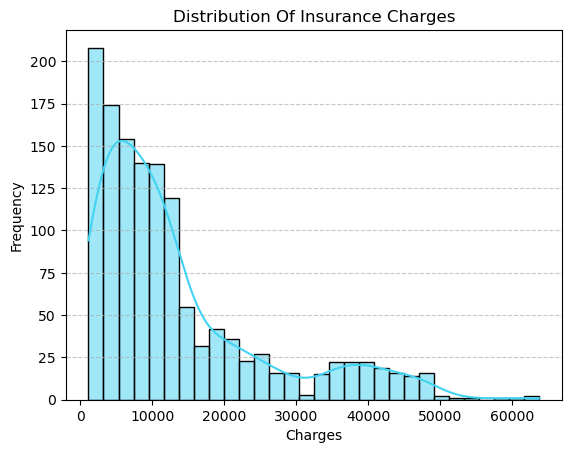

In [85]:
sns.histplot(data['charges'], bins = 30, kde = True, color = "#42D3F2")
plt.title("Distribution Of Insurance Charges")
plt.grid(axis = 'y', linestyle = "--", alpha = 0.7)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

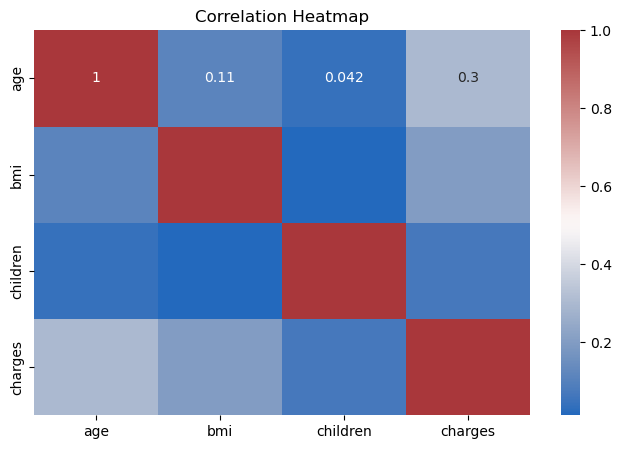

In [86]:
# 3.3 Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data[['age','bmi','children','charges']].corr(), annot=True, cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()


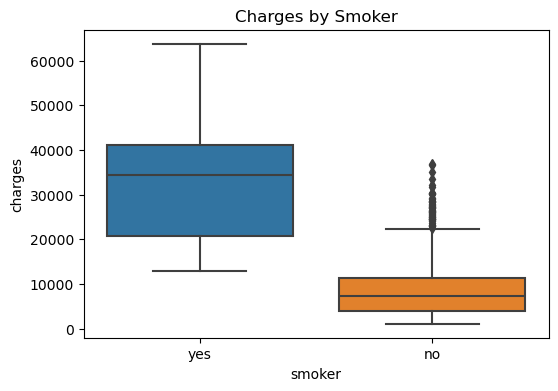

In [87]:
plt.figure(figsize = (6,4))
sns.boxplot( x = 'smoker', y ='charges', data = data)
plt.title("Charges by Smoker")
plt.show()

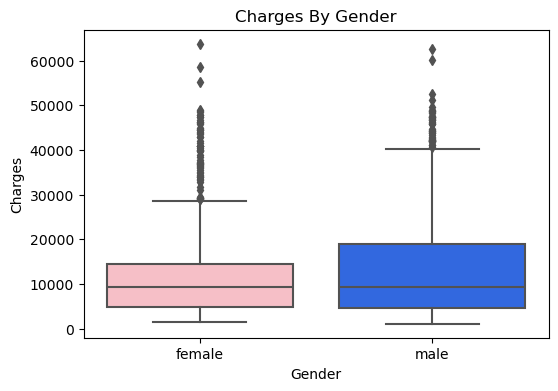

In [88]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="charges", data=data, 
            palette={'male':'#155DFC', 'female':'lightpink'})
plt.title("Charges By Gender")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()


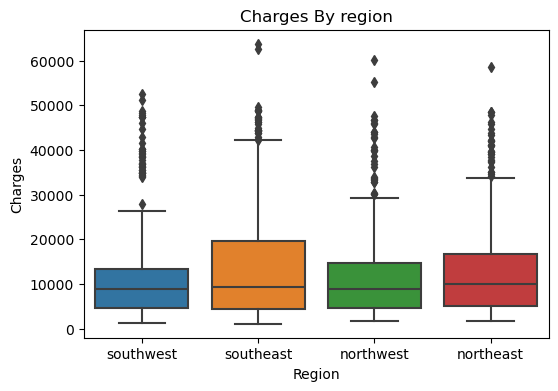

In [89]:
plt.figure(figsize= (6,4))
sns.boxplot(x = "region", y = "charges", data = data)
plt.title("Charges By region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

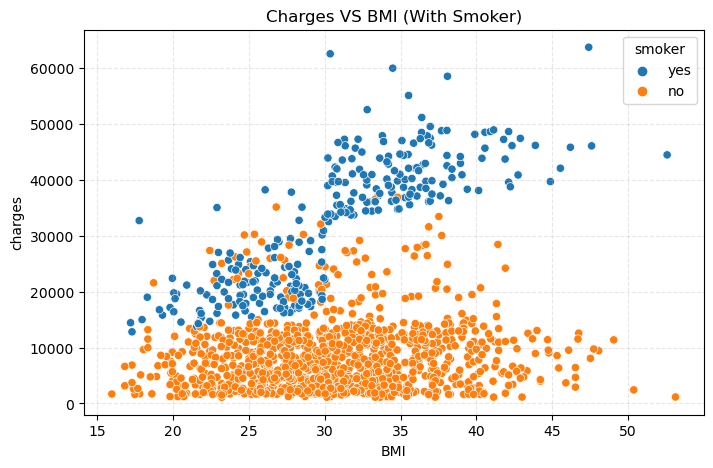

In [90]:
plt.figure(figsize= (8,5))
sns.scatterplot(x = "bmi", y = "charges", hue = 'smoker', data = data)
plt.title("Charges VS BMI (With Smoker)")
plt.xlabel("BMI")
plt.grid(axis = 'y', linestyle = "--", alpha =0.3)
plt.grid(axis = 'x', linestyle = "--", alpha =0.3)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

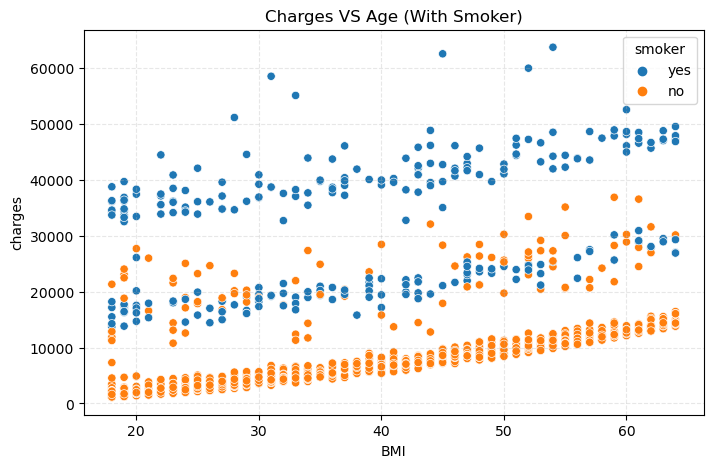

In [91]:
plt.figure(figsize= (8,5))
sns.scatterplot(x = "age", y = "charges", hue = 'smoker', data = data)
plt.title("Charges VS Age (With Smoker)")
plt.xlabel("BMI")
plt.grid(axis = 'y', linestyle = "--", alpha =0.3)
plt.grid(axis = 'x', linestyle = "--", alpha =0.3)

plt.show

In [92]:
# As the charges as highly skewed we need to do log transformation 

data["Charges_log"] = np.log(data['charges'])

C:\Users\praty\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


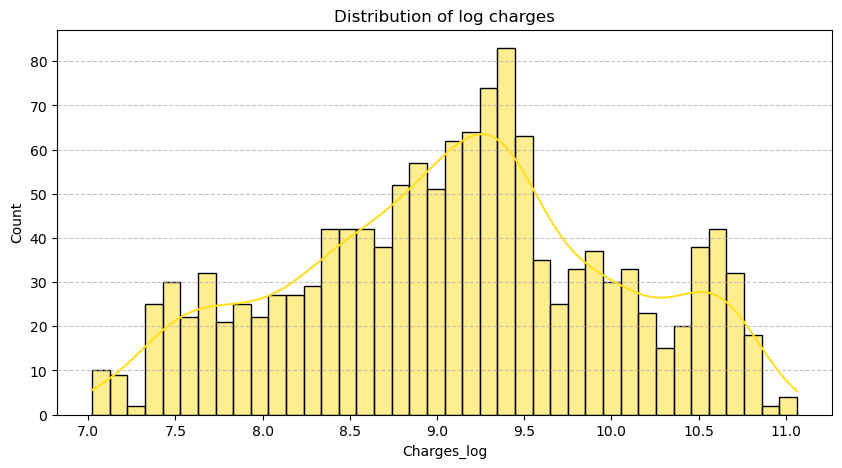

In [93]:
plt.figure(figsize = (10,5))
sns.histplot(data["Charges_log"], bins = 40, kde = True, color = "#FFDF20")
plt.title("Distribution of log charges")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

## Encoding Categorical Values

In [94]:
data["sex"] = data["sex"].map({'male':0, 'female':1})
data["smoker"] = data["smoker"].map({"no":0, "yes":1})
data = pd.get_dummies(data, columns = ["region"], drop_first = True)

In [98]:
X = data.drop(["charges", "Charges_log"], axis = 1) # Features
y = data["Charges_log"] # Target

In [100]:
scaler = StandardScaler()
X[["age", "bmi", "children"]] = scaler.fit_transform(X[["age", "bmi", "children"]])

## Test_Train_Split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test) 
y_pred = np.exp(y_pred_log)
y_test_orig = np.exp(y_test)

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: Charges_log, Length: 268, dtype: float64

## Evaluation Metrics

In [111]:
# Evaluation on log scale
mae_log = mean_absolute_error(y_test, y_pred_log)
rmse_log = mean_squared_error(y_test, y_pred_log, squared=False)
r2_log = r2_score(y_test, y_pred_log)

In [121]:
print("Evaluation on Log Scale :-\n")
print("r2_LOG:",r2_log)
print("RMSE LOG:",rmse_log)
print("MAE Log:",mae_log)

Evaluation on Log Scale :-

r2_LOG: 0.8047311493462986
RMSE LOG: 0.4190157084978039
MAE Log: 0.2696916350040462


In [122]:
mae_orig = mean_absolute_error(y_test_orig, y_pred)
rmse_orig = mean_squared_error(y_test_orig, y_pred, squared=False)
r2_orig = r2_score(y_test_orig, y_pred)

print("\nOriginal-scale Metrics:")
print(f"MAE: {mae_orig:.2f}, RMSE: {rmse_orig:.2f}, R2: {r2_orig:.4f}")


Original-scale Metrics:
MAE: 3888.77, RMSE: 7815.31, R2: 0.6066


## Residual Analysis

C:\Users\praty\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


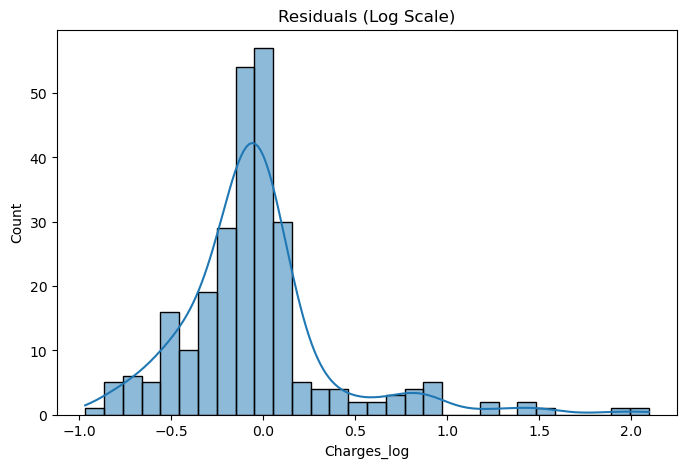

In [123]:
residuals = y_test - y_pred_log

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals (Log Scale)')
plt.show()


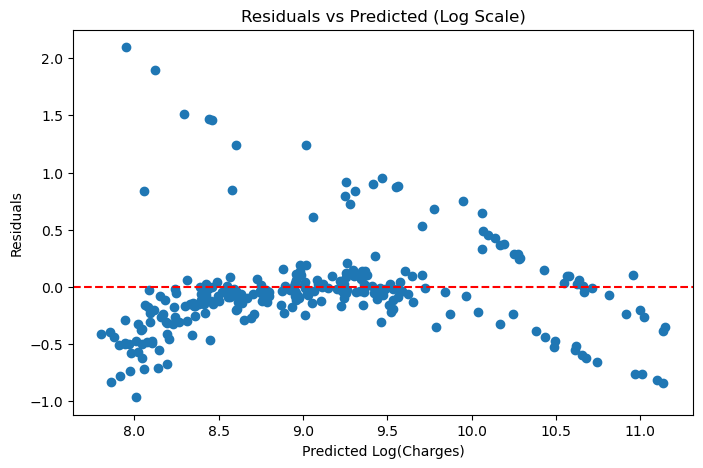

In [124]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred_log, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Log(Charges)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Log Scale)')
plt.show()

            Feature  Coefficient
4            smoker     1.551698
0               age     0.480968
3          children     0.111404
2               bmi     0.082903
1               sex     0.074350
5  region_northwest    -0.056414
7  region_southwest    -0.122557
6  region_southeast    -0.136068


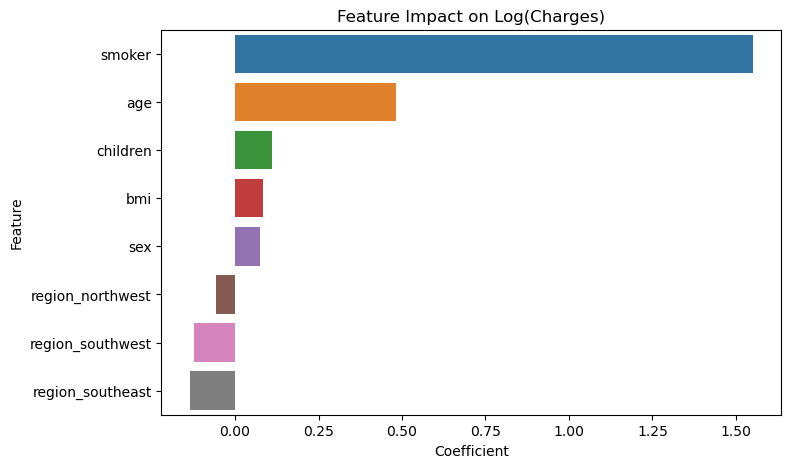

In [125]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Impact on Log(Charges)')
plt.show()